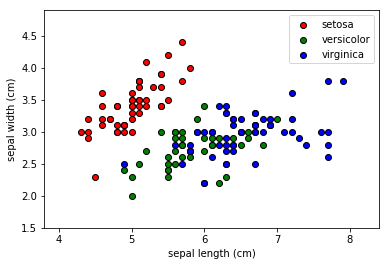

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

# Đọc dữ liệu iris
iris = datasets.load_iris()

# Lấy 2 đặc trưng đầu tiên (trong số 4 đặc trưng)
X = iris.data[:, :2]  

# Lấy nhãn của các mẫu
y = iris.target

# Lấy giá trị min, max của các đặc trưng để vẽ hình
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots()

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k')

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend()

# Đưa ra màn hình
plt.show()

In [13]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Đọc dữ liệu Iris
iris = datasets.load_iris()

# Cấp phát một mô hình Gaussian Naive Bayes
gnb = GaussianNB()

# Lấy 2 đặc trưng đầu tiên (trong số 4 đặc trưng)
X = iris.data[:, :2]  
# Lấy nhãn của các mẫu
y = iris.target

# Huấn luyện mô hình 
gnb.fit(X, iris.target)

# Dự đoán trên dữ liệu huấn luyện
y_pred = gnb.predict(X)

# tính số mẫu dự đoán sai iris.target != y_pred
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0], (iris.target != y_pred).sum() ))

Number of mislabeled points out of a total 150 points : 33


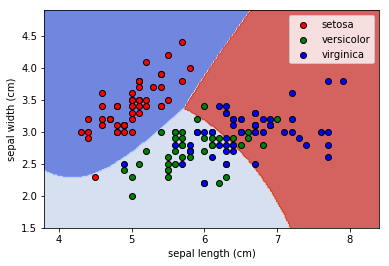

In [15]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """ Tạo lưới 2 chiều để vẽ 

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max, y_min, y_max

def plot_contours(ax, clf, xx, yy, **params):
    """ Vẽ đường các vùng ra quyết định của 1 mô hình phân lớp

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Lấy giá trị min, max của các đặc trưng để vẽ hình
xx, yy, x_min, x_max, y_min, y_max = make_meshgrid(X[:,0], X[:,1])

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots()

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

# Vẽ các vùng quyết định của mô hình (sau khi huấn luyện)
plot_contours(ax, gnb, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k')

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend()

# Đưa ra màn hình
plt.show()